In [ ]:
#q1
#part1
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()
#upload shoes dataset

Saving shoes.zip to shoes.zip


In [ ]:
import zipfile
import os
zip_path = "shoes.zip"  # name of the file
extract_path = "/content/drive/MyDrive/shoes_dataset"  # route of the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# check uploaded data
print(os.listdir(extract_path))

['test', 'train']


In [ ]:
# Set paths for train and test directories
train_dir = os.path.join(extract_path, 'train')
test_dir = os.path.join(extract_path, 'test')

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Prepare data augmentation and normalization for training data
train_datagen = ImageDataGenerator(rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
                                   rotation_range=20,  # Randomly rotate images
                                   width_shift_range=0.2,  # Randomly shift images horizontally
                                   height_shift_range=0.2,  # Randomly shift images vertically
                                   shear_range=0.2,  # Apply shearing transformations
                                   zoom_range=0.2,  # Randomly zoom into images
                                   horizontal_flip=True)  # Randomly flip images horizontally

# Prepare normalization for testing data
test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values to [0, 1]

# Load training data from directory
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(128, 128),  # Resize images to 128x128
                                               batch_size=32,  # Process images in batches of 32
                                               class_mode='categorical')  # Use categorical labels

# Load testing data from directory
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(128, 128),  # Resize images to 128x128
                                             batch_size=32,  # Process images in batches of 32
                                             class_mode='categorical')  # Use categorical labels

# Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),  # First convolutional layer
    tf.keras.layers.MaxPooling2D(2, 2),  # First max-pooling layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer
    tf.keras.layers.MaxPooling2D(2, 2),  # Second max-pooling layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),  # Third convolutional layer
    tf.keras.layers.MaxPooling2D(2, 2),  # Third max-pooling layer
    tf.keras.layers.Flatten(),  # Flatten the output to feed into the dense layer
    tf.keras.layers.Dense(128, activation='relu'),  # Fully connected dense layer
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer with softmax activation (3 classes: adidas, converse, nike)
])

# Compile the model
model.compile(optimizer='adam',  # Use Adam optimizer
              loss='categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])  # Metric to evaluate during training

# Train the model
model.fit(train_data, validation_data=test_data, epochs=10)  # Train for 10 epochs


# Save the model in HDF5 format
model.save('/content/drive/MyDrive/saved_model.h5')  # Change the path as needed

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy * 100:.2f}%")



Found 711 images belonging to 3 classes.
Found 114 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.3533 - loss: 1.4623 - val_accuracy: 0.4035 - val_loss: 1.0969
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.3583 - loss: 1.0960 - val_accuracy: 0.3509 - val_loss: 1.0814
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.3347 - loss: 1.0907 - val_accuracy: 0.3772 - val_loss: 1.0660
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.4043 - loss: 1.0802 - val_accuracy: 0.4298 - val_loss: 1.0516
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.3972 - loss: 1.0925 - val_accuracy: 0.4474 - val_loss: 1.0471
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.3718 - loss: 1.0732 - val_accuracy: 0.4561 - val_loss: 1.0362
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.4256 - loss: 1.0770 - val_accuracy: 0.4123 - val_loss: 1.0450
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.3993 - loss: 1.0780 - val_accuracy: 0.4649 - val_loss: 1.0426
Epo

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step - accuracy: 0.4685 - loss: 1.0453
Test Accuracy: 44.74%


In [ ]:
# Save the model in HDF5 format
model.save('/content/drive/MyDrive/saved_model.h5')  # Change the path as needed

Found 114 images belonging to 3 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 466ms/step


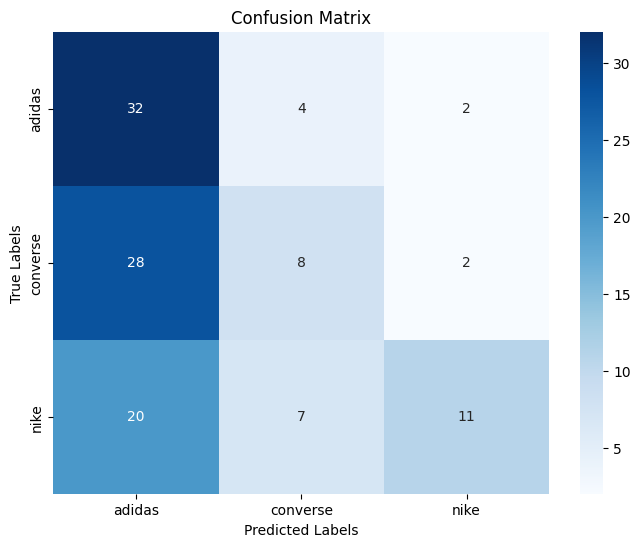

Classification Report:
              precision    recall  f1-score   support

      adidas       0.40      0.84      0.54        38
    converse       0.42      0.21      0.28        38
        nike       0.73      0.29      0.42        38

    accuracy                           0.45       114
   macro avg       0.52      0.45      0.41       114
weighted avg       0.52      0.45      0.41       114



In [ ]:
# q1- part2t
# Import libraries
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model  # Import load_model to load saved model

# Load the HDF5 model
model = load_model('/content/drive/MyDrive/saved_model.h5')

# Prepare test data generator (if not already defined)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Define the path to the test directory
test_dir = "/content/drive/MyDrive/shoes_dataset/test"

# Load test data
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(128, 128),
                                             batch_size=32,
                                             class_mode='categorical',
                                             shuffle=False)  # shuffle=False to match predictions with true labels

# Get true labels and predictions
true_labels = test_data.classes  # True labels from test data
predictions = model.predict(test_data)  # Model predictions
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(true_labels, predicted_labels, target_names=test_data.class_indices.keys())
print("Classification Report:")
print(report)


Found 711 images belonging to 3 classes.
Found 114 images belonging to 3 classes.
Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.3674 - loss: 1.3508 - val_accuracy: 0.3246 - val_loss: 1.0947
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.3799 - loss: 1.0962 - val_accuracy: 0.3860 - val_loss: 1.0759
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.3983 - loss: 1.0856 - val_accuracy: 0.3684 - val_loss: 1.0516
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.4240 - loss: 1.0610 - val_accuracy: 0.4386 - val_loss: 1.0537
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.3859 - loss: 1.0806 - val_accuracy: 0.4211 - val_loss: 1.0525
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.3895 - loss: 1.0767 - val_accuracy: 0.4123 - val_loss: 1.0438
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.4286 - loss: 1.0680 - val_accuracy: 0.4035 - val_loss: 1.0448
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 663ms/step - accuracy: 0.4313 - loss: 1.0309
Modified Model Test Accuracy: 50.00%
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step


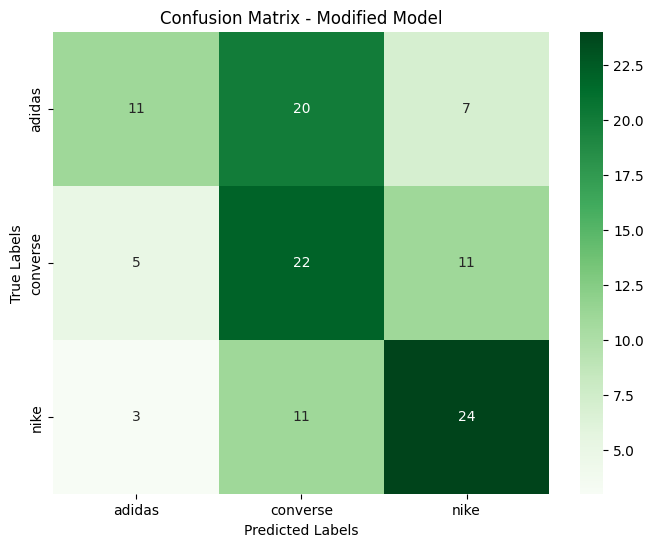

Classification Report - Modified Model:
              precision    recall  f1-score   support

      adidas       0.58      0.29      0.39        38
    converse       0.42      0.58      0.48        38
        nike       0.57      0.63      0.60        38

    accuracy                           0.50       114
   macro avg       0.52      0.50      0.49       114
weighted avg       0.52      0.50      0.49       114



In [ ]:
#q1-part 3
# Import necessary libraries
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set paths for train and test directories
train_dir = os.path.join("/content/drive/MyDrive/shoes_dataset", 'train')
test_dir = os.path.join("/content/drive/MyDrive/shoes_dataset", 'test')

# Prepare data augmentation and normalization for training data
train_datagen = ImageDataGenerator(rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
                                   rotation_range=25,  # Increased rotation range
                                   width_shift_range=0.3,  # Increased horizontal shift
                                   height_shift_range=0.3,  # Increased vertical shift
                                   shear_range=0.3,  # Increased shearing
                                   zoom_range=0.3,  # Increased zoom
                                   horizontal_flip=True)  # Randomly flip images horizontally

# Prepare normalization for testing data
test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values to [0, 1]

# Load training data from directory
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(128, 128),  # Resize images to 128x128
                                               batch_size=32,  # Process images in batches of 32
                                               class_mode='categorical')  # Use categorical labels

# Load testing data from directory
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(128, 128),  # Resize images to 128x128
                                             batch_size=32,  # Process images in batches of 32
                                             class_mode='categorical',
                                             shuffle=False)  # Shuffle=False for evaluation

# Build a modified CNN model
model_v2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (5, 5), activation='relu', input_shape=(128, 128, 3)),  # Increased filters and kernel size
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),  # Increased neurons in dense layer
    tf.keras.layers.Dropout(0.5),  # Dropout layer added to prevent overfitting
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer with softmax activation (3 classes)
])

# Compile the modified model
model_v2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Reduced learning rate
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Train the modified model
model_v2.fit(train_data, validation_data=test_data, epochs=10)  # Train for 10 epochs

# Save the modified model in HDF5 format
model_v2.save('/content/drive/MyDrive/saved_model_v2.h5')  # Save modified model

# Evaluate the modified model on the test data
loss_v2, accuracy_v2 = model_v2.evaluate(test_data)
print(f"Modified Model Test Accuracy: {accuracy_v2 * 100:.2f}%")

# Get true labels and predictions
true_labels = test_data.classes
predictions_v2 = model_v2.predict(test_data)
predicted_labels_v2 = np.argmax(predictions_v2, axis=1)

# Confusion matrix
conf_matrix_v2 = confusion_matrix(true_labels, predicted_labels_v2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_v2, annot=True, fmt='d', cmap='Greens', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Modified Model')
plt.show()

# Classification report
report_v2 = classification_report(true_labels, predicted_labels_v2, target_names=test_data.class_indices.keys())
print("Classification Report - Modified Model:")
print(report_v2)


In [ ]:
#q2
import zipfile
import os
zip_path = "/content/drive/MyDrive/emotions.zip"  # name of the file
extract_path = "/content/drive/MyDrive/emotion_dataset"  # route of the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# check uploaded data
print(os.listdir(extract_path))

['fer2013.csv', 'fer2013']


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 1)           │             577 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 739,073 (2.82 MB)

 Trainable params: 739,073 (2.82 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 499s 2s/step - loss: 0.0166 - mean_absolute_error: 0.0850 - val_loss: 0.0011 - val_mean_absolute_error: 0.0228
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 497s 2s/step - loss: 9.7446e-04 - mean_absolute_error: 0.0217 - val_loss: 6.3475e-04 - val_mean_absolute_error: 0.0173
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 487s 2s/step - loss: 6.9763e-04 - mean_absolute_error: 0.0187 - val_loss: 5.1103e-04 - val_mean_absolute_error: 0.0156
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 513s 2s/step - loss: 5.4270e-04 - mean_absolute_error: 0.0162 - val_loss: 4.6351e-04 - val_mean_absolute_error: 0.0152
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 492s 2s/step - loss: 4.6263e-04 - mean_absolute_error: 0.0149 - val_loss: 3.9539e-04 - val_mean_absolute_error: 0.0138
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 500s 2s/step - loss: 4.4121e-04 - mean_absolute_error: 0.0150 - val_loss: 3.1418e-04 - val_mean_absolute_error: 0.0119
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 528s 2s/step -

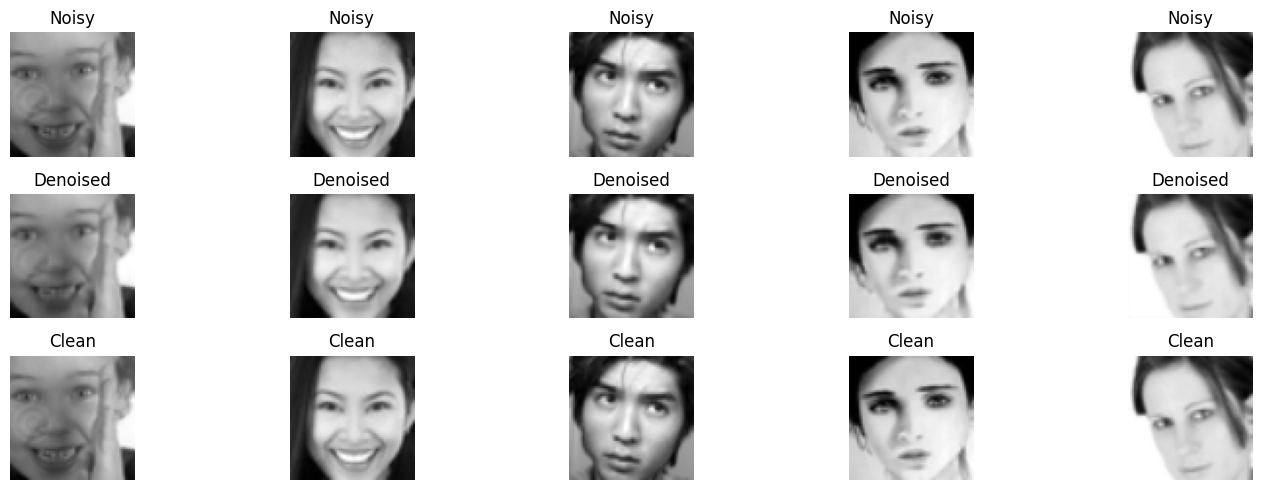

In [ ]:
import zipfile
import os
import pandas as pd
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
import matplotlib.pyplot as plt

# Paths to the CSV and image folder
csv_path = os.path.join("/content/drive/MyDrive/emotion_dataset", "fer2013", "fer2013.csv")
image_folder = os.path.join("/content/drive/MyDrive/emotion_dataset", "fer2013")

# Load CSV data
data = pd.read_csv(csv_path)

# Reduce dataset size for memory optimization
data = data.sample(n=5000, random_state=42)  # Randomly select 5000 rows
# Function to preprocess images
def preprocess_images(image_folder, data, target_size=(64, 64)):
    noisy_images = []
    clean_images = []

    for _, row in data.iterrows():
        # Assuming images are stored in a column "pixels" as space-separated values
        pixels = np.array(row['pixels'].split(), dtype=np.float32).reshape(48, 48)
        resized = cv2.resize(pixels, target_size)

        # Add synthetic noise to images
        noisy = resized + np.random.normal(scale=0.1, size=resized.shape)
        noisy = np.clip(noisy, 0, 255)

        # Normalize images to [0, 1]
        noisy_images.append(noisy / 255.0)
        clean_images.append(resized / 255.0)

    noisy_images = np.expand_dims(np.array(noisy_images), axis=-1)
    clean_images = np.expand_dims(np.array(clean_images), axis=-1)
    return noisy_images, clean_images

noisy_images, clean_images = preprocess_images(image_folder, data)

# Define the Denoising CNN with a U-Net Architecture
def build_denoising_unet(input_shape=(64, 64, 1)):
    inputs = Input(shape=input_shape)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    # Bottleneck
    bn = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)

    # Decoder
    u1 = layers.UpSampling2D((2, 2))(bn)
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u1)

    u2 = layers.UpSampling2D((2, 2))(c3)
    c4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u2)

    # Output layer
    outputs = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(c4)

    model = models.Model(inputs, outputs)
    return model

# Compile and summarize the model
input_shape = (64, 64, 1)  # Reduced image size
model = build_denoising_unet(input_shape)
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])
model.summary()

# Train the model
history = model.fit(
    noisy_images, clean_images,
    epochs=10,
    batch_size=16,  # Lowered batch size
    validation_split=0.2
)

# Evaluate the model
loss, mae = model.evaluate(noisy_images, clean_images)
print(f"Model Evaluation - Loss: {loss}, MAE: {mae}")

# Visualize a few denoising results
def display_results(model, noisy_images, clean_images, num_images=5):
    predictions = model.predict(noisy_images[:num_images])

    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(3, num_images, i + 1)
        plt.title("Noisy")
        plt.imshow(noisy_images[i].squeeze(), cmap='gray')
        plt.axis('off')

        plt.subplot(3, num_images, i + 1 + num_images)
        plt.title("Denoised")
        plt.imshow(predictions[i].squeeze(), cmap='gray')
        plt.axis('off')

        plt.subplot(3, num_images, i + 1 + 2 * num_images)
        plt.title("Clean")
        plt.imshow(clean_images[i].squeeze(), cmap='gray')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

display_results(model, noisy_images, clean_images)


In [ ]:
#q3
from google.colab import files
uploaded = files.upload()
#upload shoes dataset

Saving airplanes.zip to airplanes.zip


In [ ]:
#q3-part1
import zipfile
import os
zip_path = "airplanes.zip"  # name of the file
airplanes_extract_path = "/content/drive/MyDrive/airplane_dataset"  # route of the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(airplanes_extract_path)

# check uploaded data
print(os.listdir(airplanes_extract_path))

['Airplanes_Annotations', 'Images']


In [ ]:
import pandas as pd
import os
from PIL import Image

annotations_path = "/content/drive/MyDrive/airplane_dataset/Airplanes_Annotations/Airplanes_Annotations"  # Path to CSV files
images_path = "/content/drive/MyDrive/airplane_dataset/Images/Images"  # Path to images

annotations = []
for csv_file in os.listdir(annotations_path):
    if csv_file.endswith(".csv"):
        annotation_path = os.path.join(annotations_path, csv_file)
        df = pd.read_csv(annotation_path, header=None, names=["bbox"])

        # Ensure that bbox values are converted to string type
        df["bbox"] = df["bbox"].astype(str)

        # Split the bbox information into columns: x_min, y_min, x_max, y_max
        bbox_split = df["bbox"].str.split(" ", expand=True)

        # Check if the number of columns is correct
        if bbox_split.shape[1] == 4:
            bbox_split = bbox_split.dropna()  # Drop rows with missing values

            # Add the values to the main DataFrame
            df[["x_min", "y_min", "x_max", "y_max"]] = bbox_split.astype(float)
            df.drop(columns=["bbox"], inplace=True)

            # Add the image_name column
            image_name = csv_file.replace(".csv", ".jpg")
            df["image_name"] = image_name

            annotations.append(df)
        else:
            print(f"Warning: {csv_file} does not have the correct number of values in bbox. Skipping.")

# Combine all data into one DataFrame
annotations_df = pd.concat(annotations, ignore_index=True)

# Remove rows with NaN values in bbox columns
annotations_df = annotations_df.dropna(subset=["x_min", "y_min", "x_max", "y_max"])

# Display a sample of the data
print(annotations_df.head())


   x_min  y_min  x_max  y_max  image_name
1   15.0   69.0   40.0   96.0   42845.jpg
2   10.0  173.0   42.0  203.0   42845.jpg
3   74.0  212.0  100.0  243.0   42845.jpg
4  233.0  197.0  256.0  226.0   42845.jpg
6  214.0   49.0  241.0   78.0  428451.jpg


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# Load and preprocess images
def load_image(image_name):
    image_path = os.path.join(images_path, image_name)
    image = load_img(image_path, target_size=(224, 224))  # Resize the image to 224x224
    image = img_to_array(image)  # Convert image to NumPy array
    image = image / 255.0  # Normalize the image
    return image

# Load images along with bounding boxes
images = []
bboxes = []

for index, row in annotations_df.iterrows():
    image = load_image(row['image_name'])
    images.append(image)

    bbox = [row['x_min'], row['y_min'], row['x_max'], row['y_max']]
    bboxes.append(bbox)

images = np.array(images)
bboxes = np.array(bboxes)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, bboxes, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Design the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4))  # For predicting bbox (x_min, y_min, x_max, y_max)

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,245,700 (84.86 MB)

 Trainable params: 22,245,700 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 360s 5s/step - loss: 20471.4531 - val_loss: 13676.8447
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 379s 5s/step - loss: 11241.1514 - val_loss: 12658.1826
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 374s 5s/step - loss: 10473.1455 - val_loss: 12444.2832
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 404s 5s/step - loss: 9714.1055 - val_loss: 13486.1826
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 363s 5s/step - loss: 10670.7754 - val_loss: 12932.7334
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 347s 4s/step - loss: 10137.7305 - val_loss: 12908.5469
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 313s 4s/step - loss: 9523.9111 - val_loss: 12711.4756
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 326s 4s/step - loss: 9872.4883 - val_loss: 11976.1455
Epoch 9/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 318s 4s/step - loss: 9394.0176 - val_loss: 12119.9297
Epoch 10/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 326s 4s/step - loss: 8870.7129 - val_loss: 11898.9072


In [ ]:
# test
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
# predict
predicted_bbox = model.predict(X_test[:1])
print(predicted_bbox)

19/19 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - loss: 11687.8555
Test Loss: 11898.9072265625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
[[248.12936 211.55429 272.83368 233.20515]]


In [ ]:
pip install torch torchvision


In [ ]:
#q3-part2
import random
import os
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt

# Load the pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Function to preprocess a single image
def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image_tensor = F.to_tensor(image)
    return image_tensor, image

# Define the directory containing images
image_path = "/content/drive/MyDrive/airplane_dataset/Images/Images"

# Create a directory to save results
results_dir = "/content/drive/MyDrive/airplane_dataset/Results"
os.makedirs(results_dir, exist_ok=True)

# Get a list of all image files in the directory
all_images = [img for img in os.listdir(image_path) if img.endswith(".jpg")]

# Select a subset of images randomly (e.g., 10 images)
sample_images = random.sample(all_images, min(len(all_images), 10))  # Adjust number of samples as needed

# Function to calculate IoU
def calculate_iou(box1, box2):
    x1, y1, x2, y2 = box1
    x1g, y1g, x2g, y2g = box2

    xi1 = max(x1, x1g)
    yi1 = max(y1, y1g)
    xi2 = min(x2, x2g)
    yi2 = min(y2, y2g)

    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)
    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x2g - x1g) * (y2g - y1g)
    union_area = box1_area + box2_area - inter_area

    iou = inter_area / union_area
    return iou

# Simulated ground truth annotations (if available)
# Replace these with actual annotations if they exist
ground_truth_annotations = [
    {'image': img, 'bbox': [50, 60, 200, 220]} for img in sample_images  # Placeholder bboxes
]

# Process the selected images and calculate IoU
iou_scores = []
for annotation in ground_truth_annotations:
    # Load ground truth bounding box
    ground_truth_bbox = annotation['bbox']

    # Load and preprocess the corresponding image
    image_file_path = os.path.join(image_path, annotation['image'])
    image_tensor, original_image = preprocess_image(image_file_path)

    # Run the model on the image
    with torch.no_grad():
        predictions = model([image_tensor])

    # Get predicted boxes with highest score above a threshold
    scores = predictions[0]['scores'].cpu().numpy()
    boxes = predictions[0]['boxes'].cpu().numpy()
    high_conf_indices = scores > 0.7  # Confidence threshold
    high_conf_boxes = boxes[high_conf_indices]

    if len(high_conf_boxes) > 0:
        predicted_bbox = high_conf_boxes[0]  # Take the highest confidence box

        # Calculate IoU
        iou = calculate_iou(predicted_bbox, ground_truth_bbox)
        iou_scores.append(iou)

        # Plot and save the image with bounding boxes
        plt.figure(figsize=(10, 10))
        plt.imshow(original_image)

        # Plot ground truth box
        x1g, y1g, x2g, y2g = ground_truth_bbox
        plt.gca().add_patch(
            plt.Rectangle((x1g, y1g), x2g - x1g, y2g - y1g, edgecolor='green', facecolor='none', lw=2, label='Ground Truth')
        )

        # Plot predicted box
        x1, y1, x2, y2 = predicted_bbox
        plt.gca().add_patch(
            plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='red', facecolor='none', lw=2, label='Prediction')
        )

        plt.legend(loc='upper left')
        plt.title(f"Detections for {annotation['image']}\nIoU: {iou:.2f}")

        save_path = os.path.join(results_dir, f"result_{annotation['image']}")
        plt.savefig(save_path)
        plt.close()

# Calculate and print mean IoU
if iou_scores:
    mean_iou = sum(iou_scores) / len(iou_scores)
    print(f"Mean IoU: {mean_iou}")
else:
    print("No predictions were made for the selected images.")

print("Processing complete. Results saved in:", results_dir)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Mean IoU: 0.156325610250823
Processing complete. Results saved in: /content/drive/MyDrive/airplane_dataset/Results
